# Delta Equity 30 Days


## Error in C2Score?

`+ ( %[Delta Equity 30 Days]% < 0 ? %[Delta Equity 30 Days]%*10 : 0 )`

I guess the condition should be `>`. Not `<`.



In [1]:
source("JupyterUtils.R")
source("C2ScoreHypothesisPresentation.R")

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        6159      212033-3434647.9000     -2.3000      0.0000     34.7067      3.40003434442.3000  14921.3892 


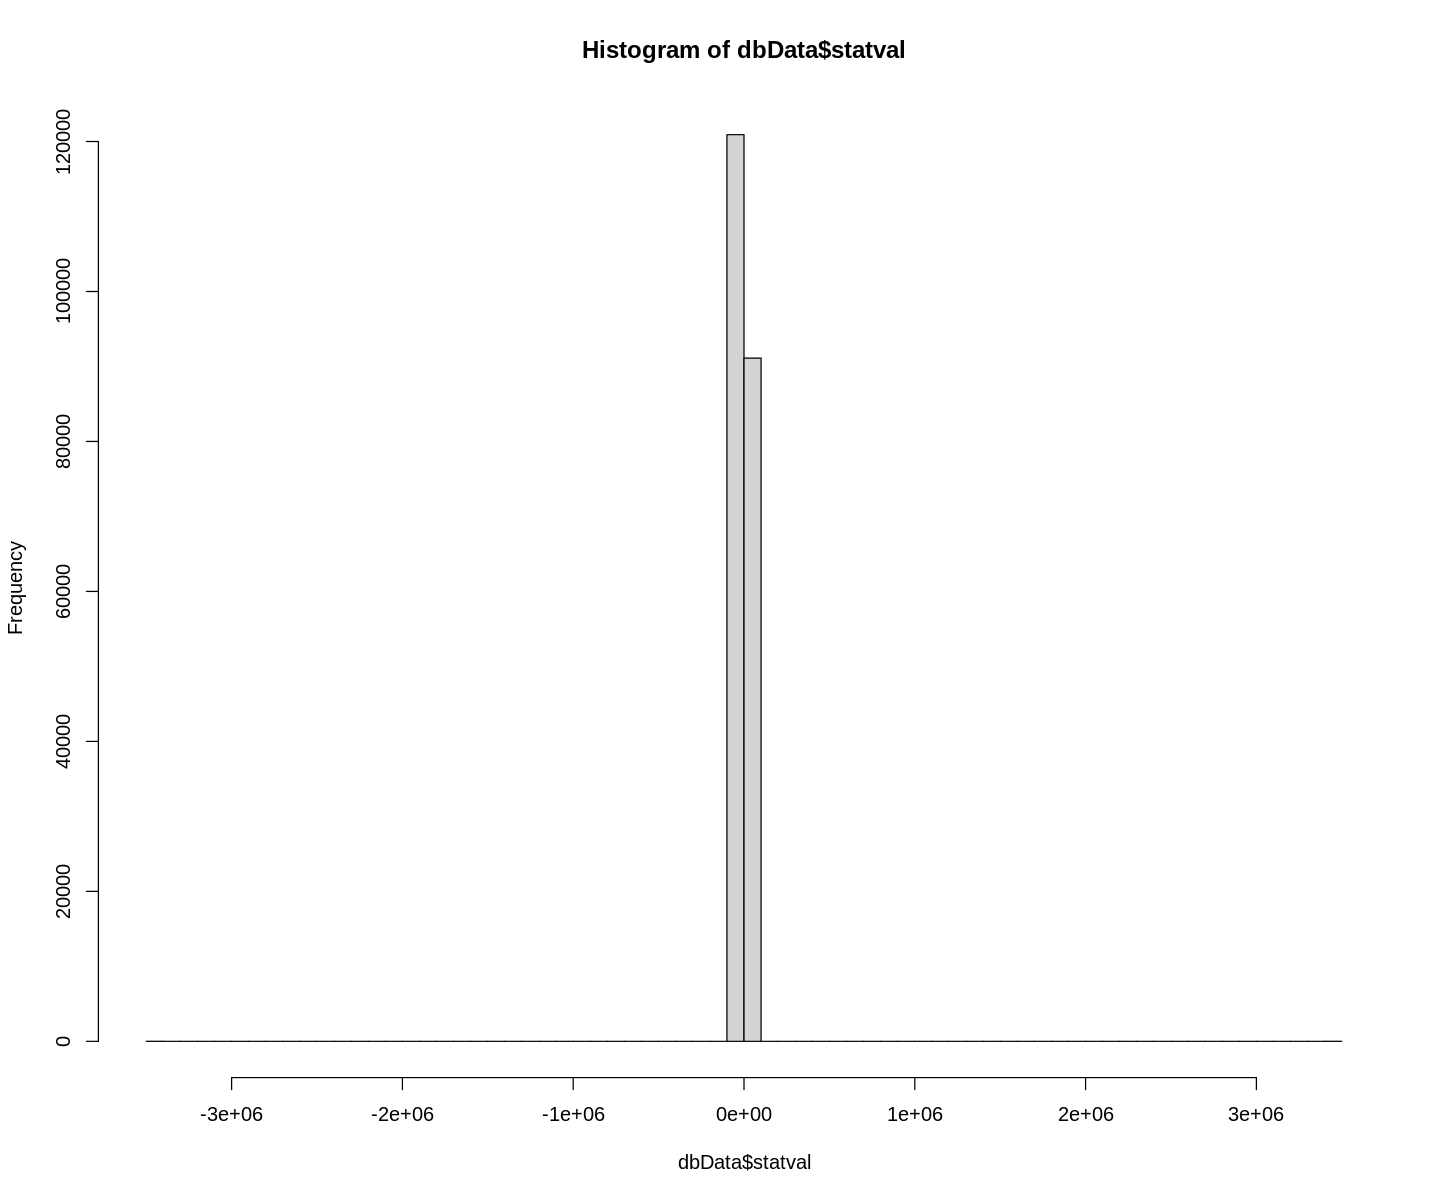

In [2]:
# What data we have.
dbData = getC2ScoreDbData("select systemid, date, statval
            from historical_stats_modern where statname='deltaequityp30'") 
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        5858      195555    -25.0000     -1.9000      0.0000      0.3843      3.0000     25.0000      7.0744 


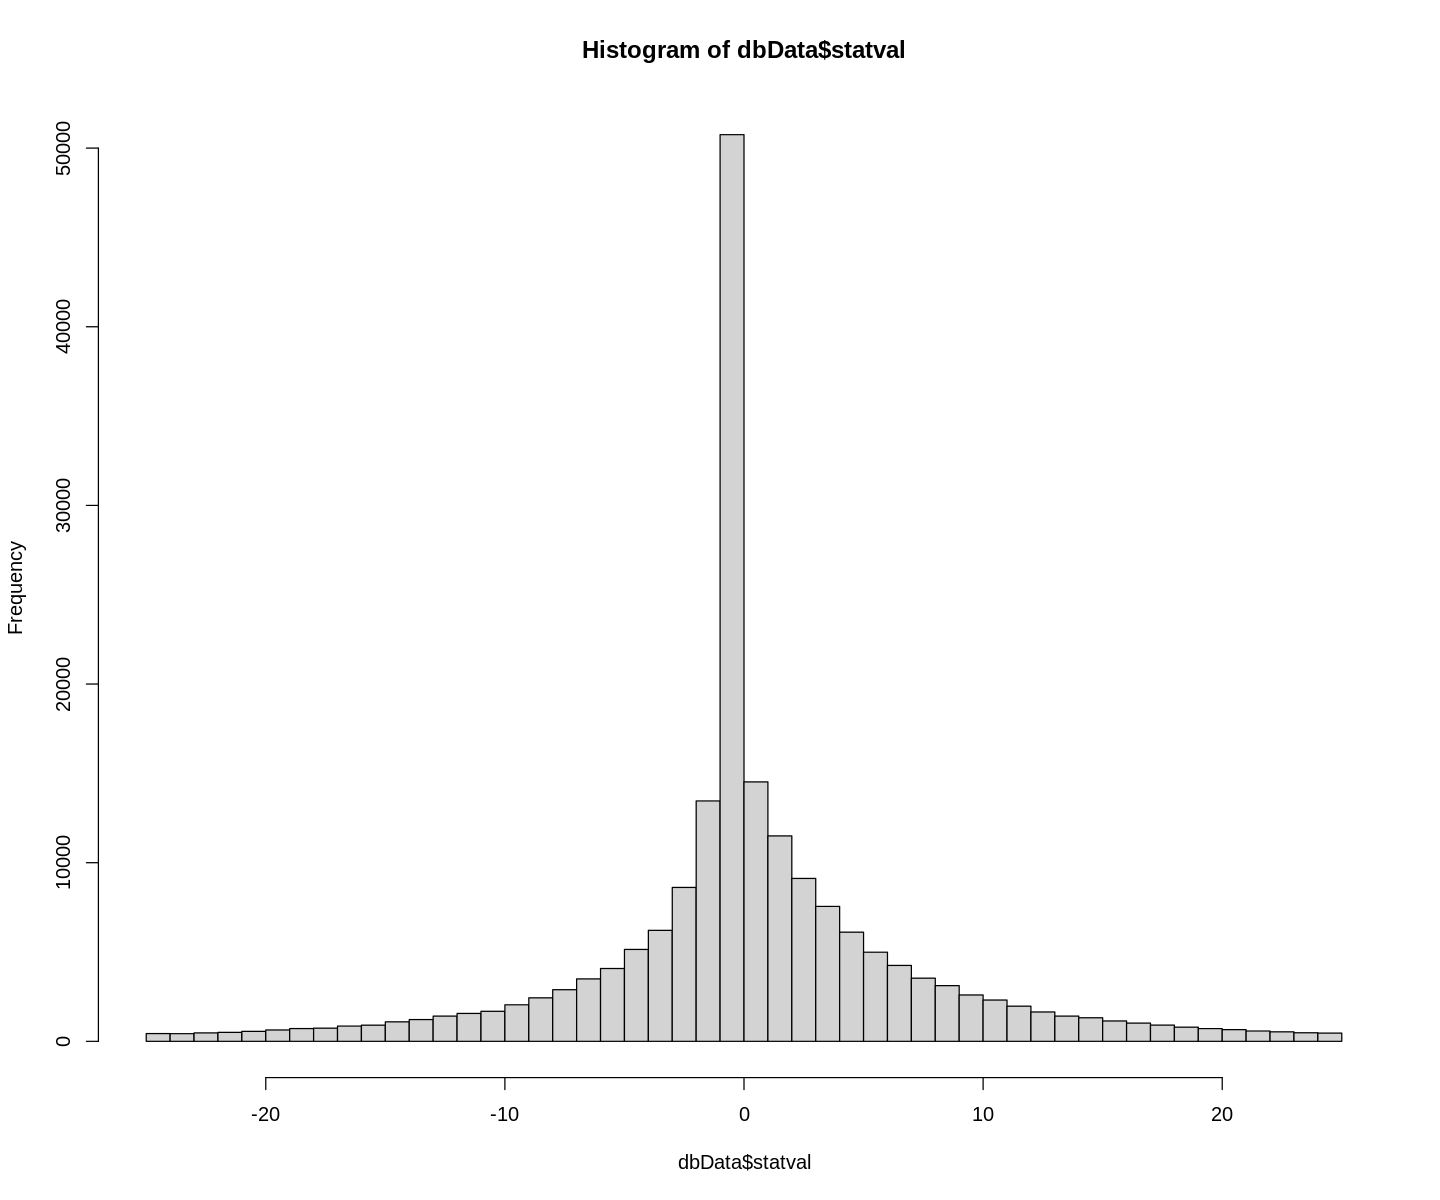

In [3]:
# Delta equity 30 days (1 month)? Somewhere between -25 and +25 percent
dbData = getC2ScoreDbData("select systemid, date, statval
            from historical_stats_modern where statname='deltaequityp30' 
            and statval >= -25 and statval <= 25")
overview(dbData)
hist(dbData$statval,breaks=50)

     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2166       43290      0.1000      1.6000      3.8000      5.5301      7.9000     25.0000      5.2285 


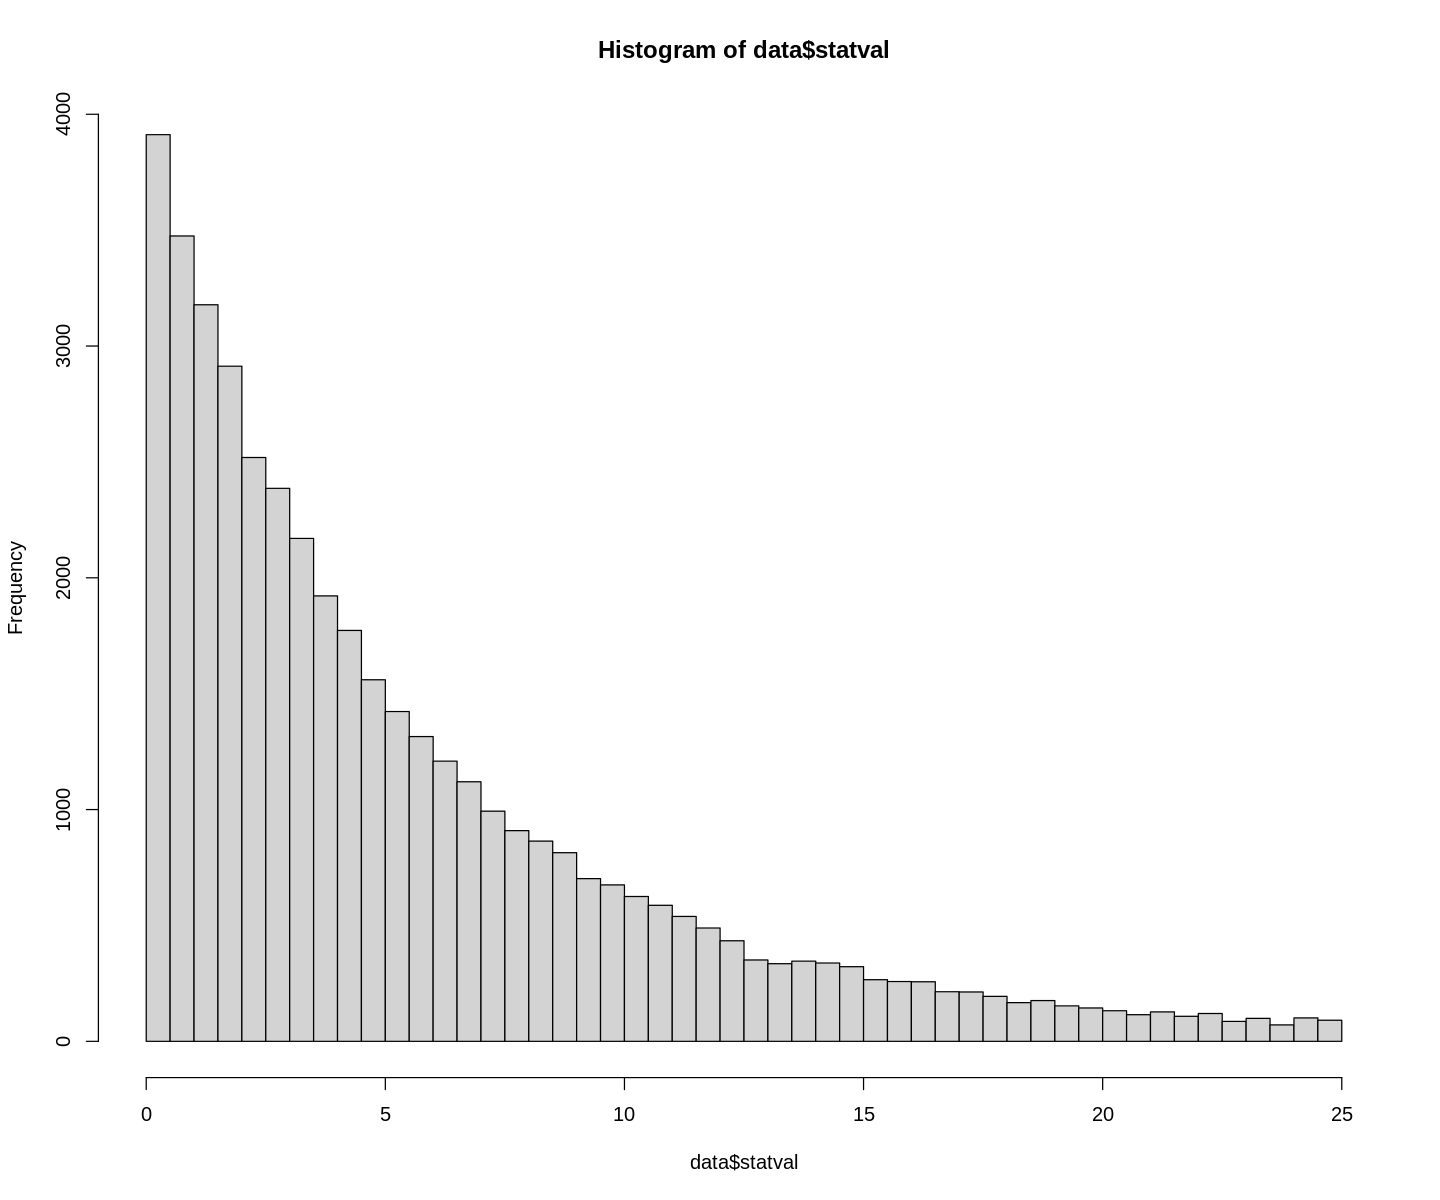

In [4]:
# Values look like in percents in this case.
# Join with cleaned data. We want just positive values.
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.date = DateStart
 where statname='deltaequityp30' and  statval > 0 and statval <= 25"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        2166       43290      0.1000      1.6000      3.8000      5.5301      7.9000     25.0000      5.2285 



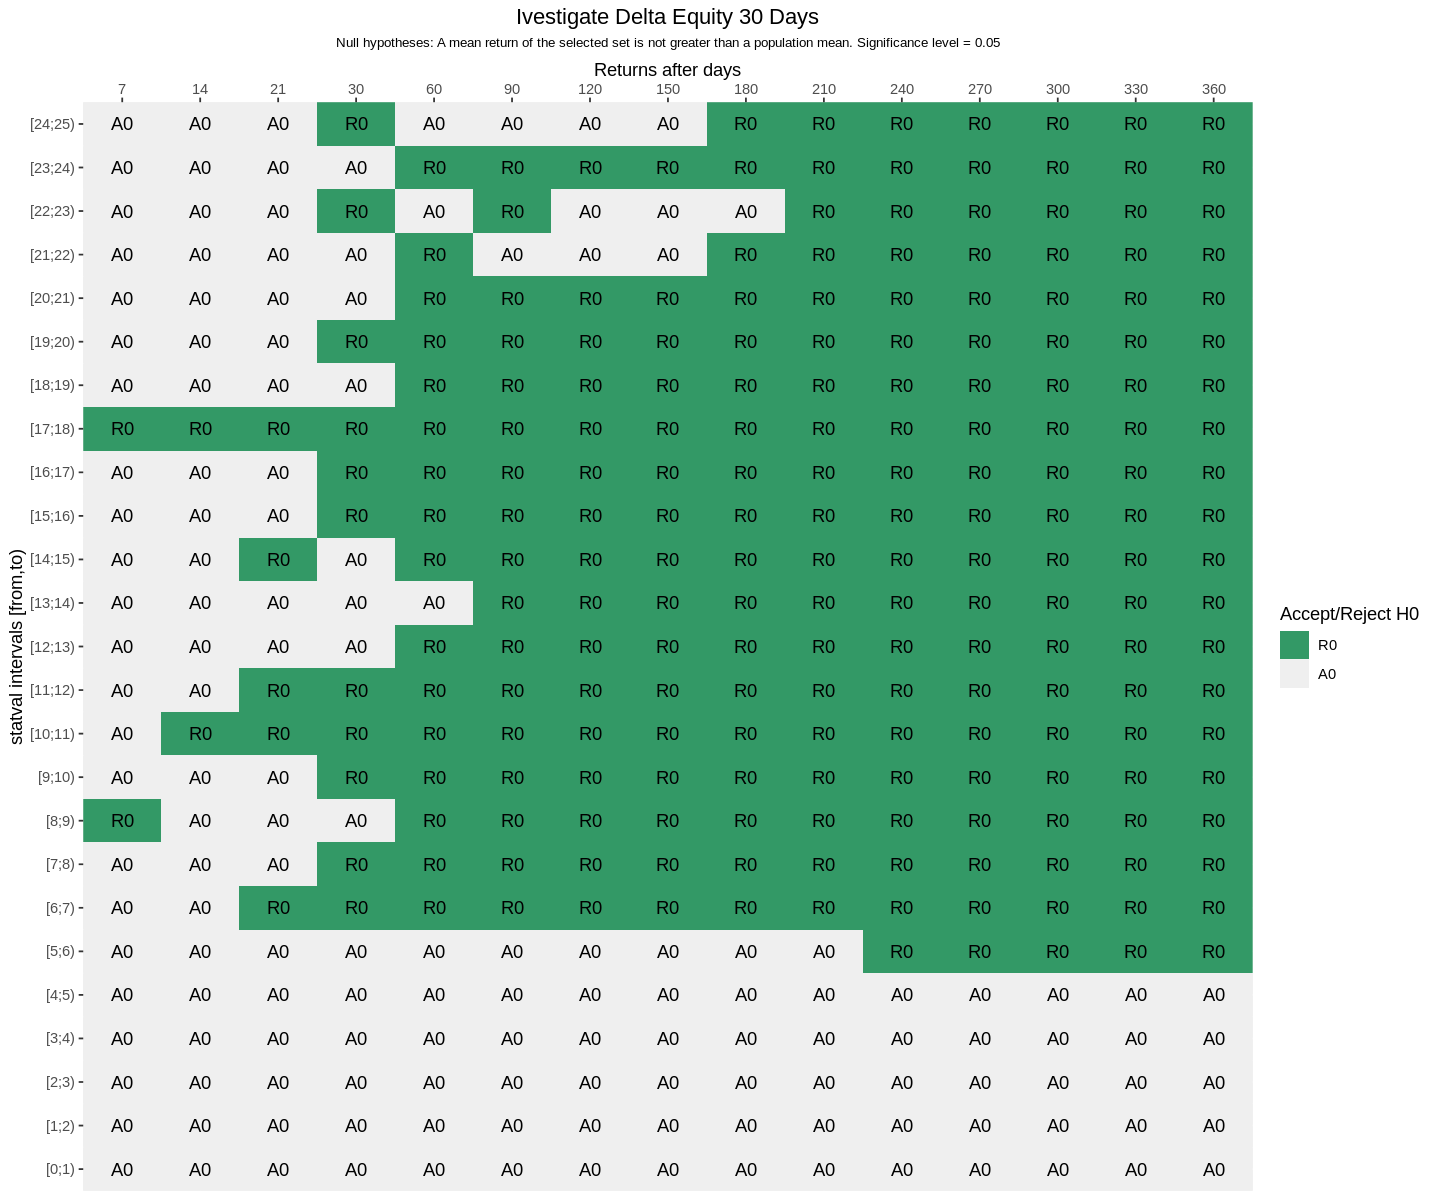

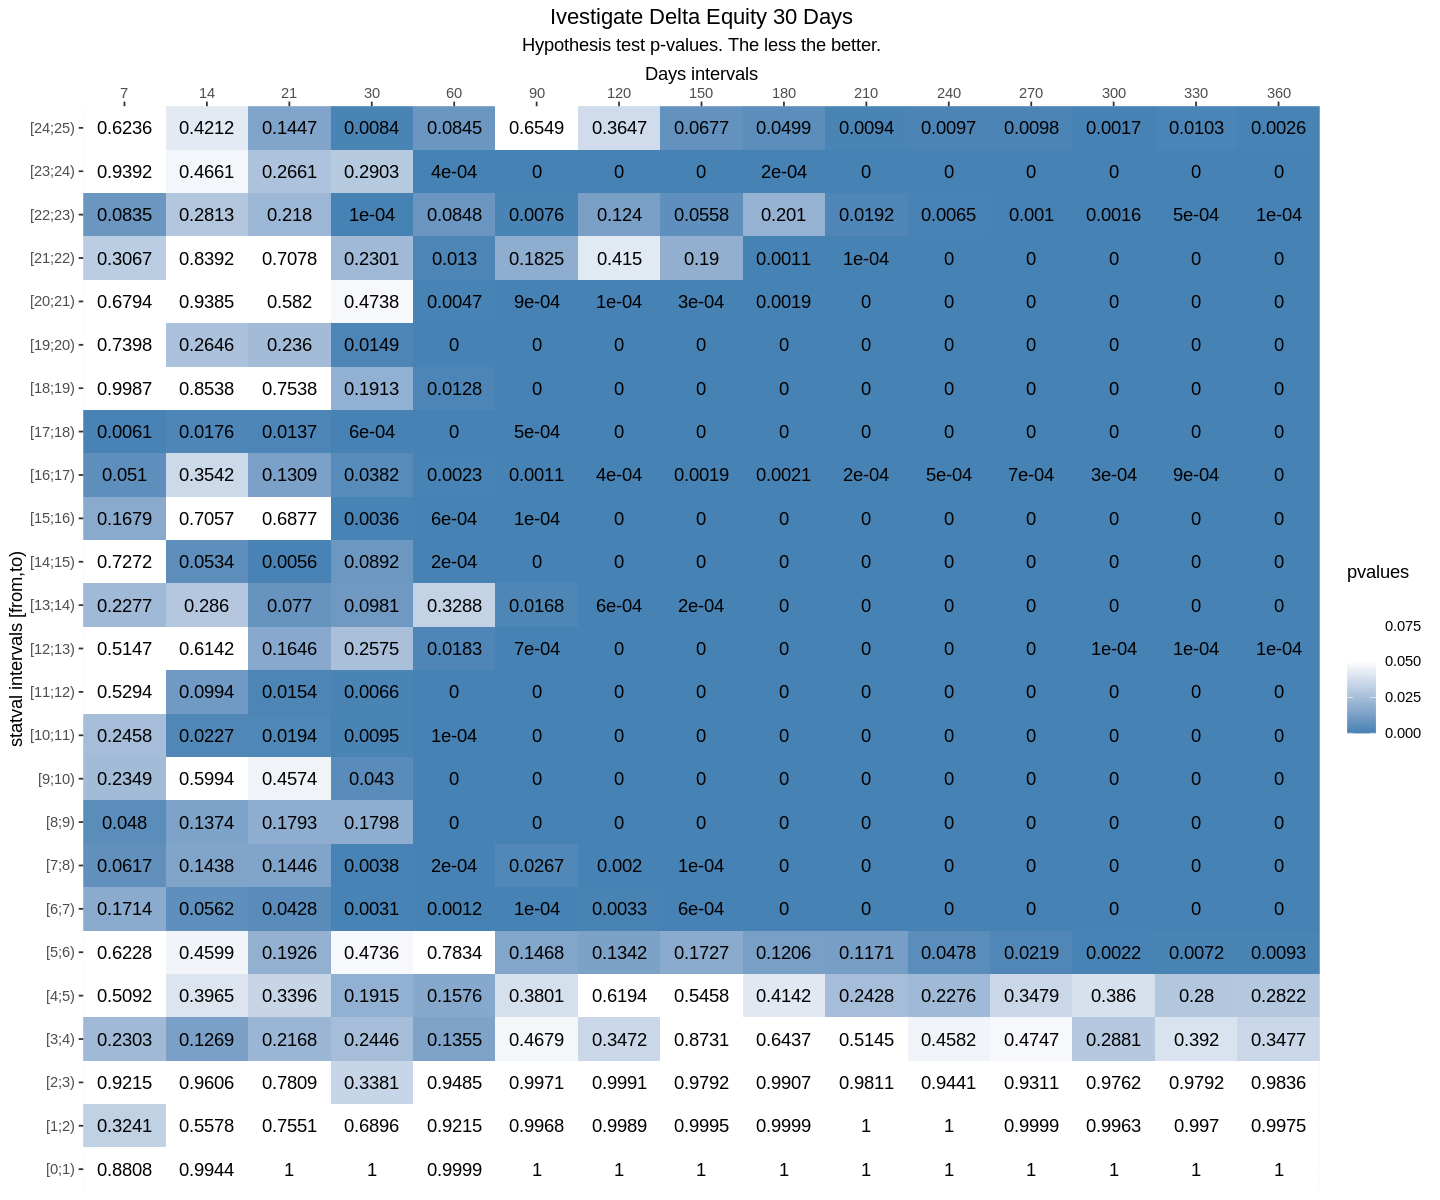

In [5]:
experiment = list(
  name = "deltaequityp30",
  description = "Ivestigate Delta Equity 30 Days",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 25, by = 1))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


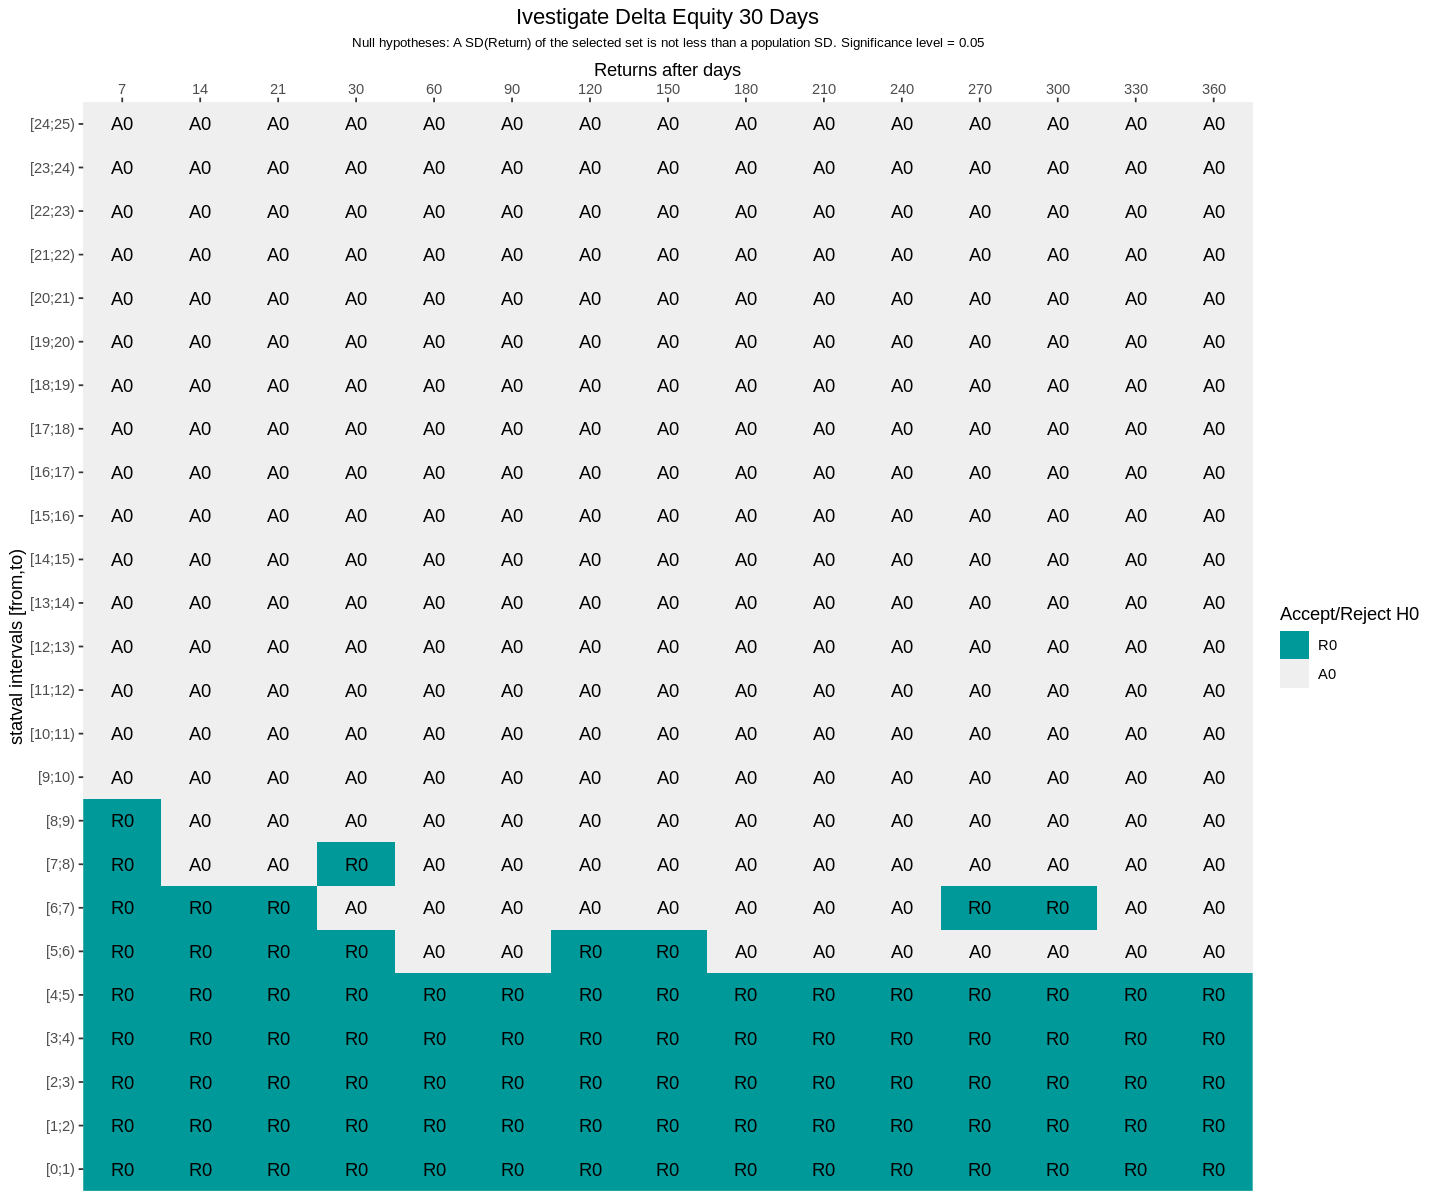

In [6]:
showSDLessHypothesisTest(experiment, result)

In [7]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24 <= statval < 25,191,188,185,178,155,134,119,107,91,73,62,54,47,40,37
23 <= statval < 24,165,162,158,153,126,110,99,92,91,84,75,70,67,59,56
22 <= statval < 23,207,203,197,187,172,153,137,125,113,100,89,80,73,68,60
21 <= statval < 22,233,229,223,218,192,175,157,143,126,114,103,93,87,70,65
20 <= statval < 21,251,247,240,230,203,183,166,153,142,131,123,113,102,95,83
19 <= statval < 20,286,280,280,265,226,203,185,168,148,136,122,114,98,85,76
18 <= statval < 19,347,334,326,319,291,263,241,219,189,177,156,139,127,112,99
17 <= statval < 18,401,394,387,370,330,299,271,247,211,194,178,166,151,134,119
16 <= statval < 17,487,477,459,433,381,340,309,278,248,229,206,186,165,146,131



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



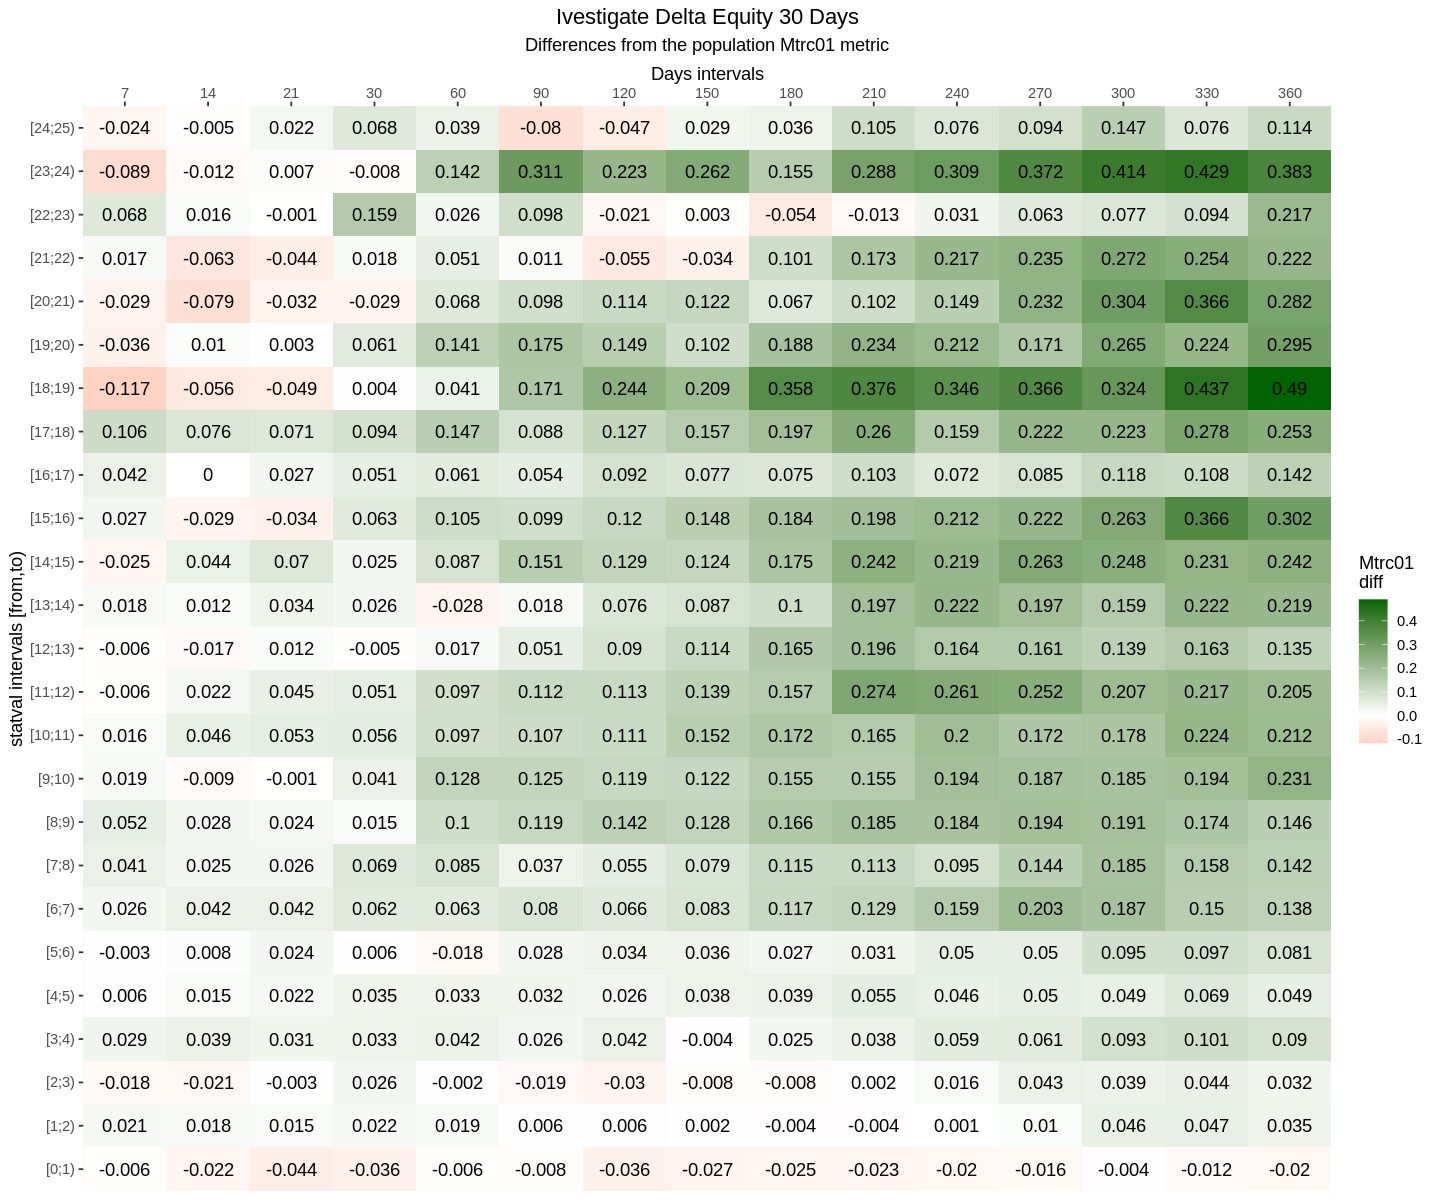

In [8]:
showMetricDifferences(experiment, result)

In [9]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24 <= statval < 25,150,147,145,138,122,102,91,81,71,59,51,44,42,35,32
23 <= statval < 24,138,136,133,130,108,94,86,80,79,73,64,59,57,55,52
22 <= statval < 23,173,169,164,159,146,128,113,102,92,81,72,64,57,55,50
21 <= statval < 22,192,189,183,180,158,146,128,116,101,91,83,76,72,62,57
20 <= statval < 21,208,205,200,190,167,149,133,123,114,104,97,90,81,78,68
19 <= statval < 20,224,219,219,207,174,156,143,132,116,106,95,89,75,65,57
18 <= statval < 19,254,245,238,235,214,191,176,161,138,131,119,107,98,86,75
17 <= statval < 18,292,286,283,274,241,219,197,179,148,134,122,116,104,94,82
16 <= statval < 17,345,340,327,309,275,243,218,193,173,159,145,133,119,105,96


### Discussion

................

### Age > 90


     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1802       34244      0.1000      1.5000      3.7000      5.3576      7.6000     25.0000      5.1000 


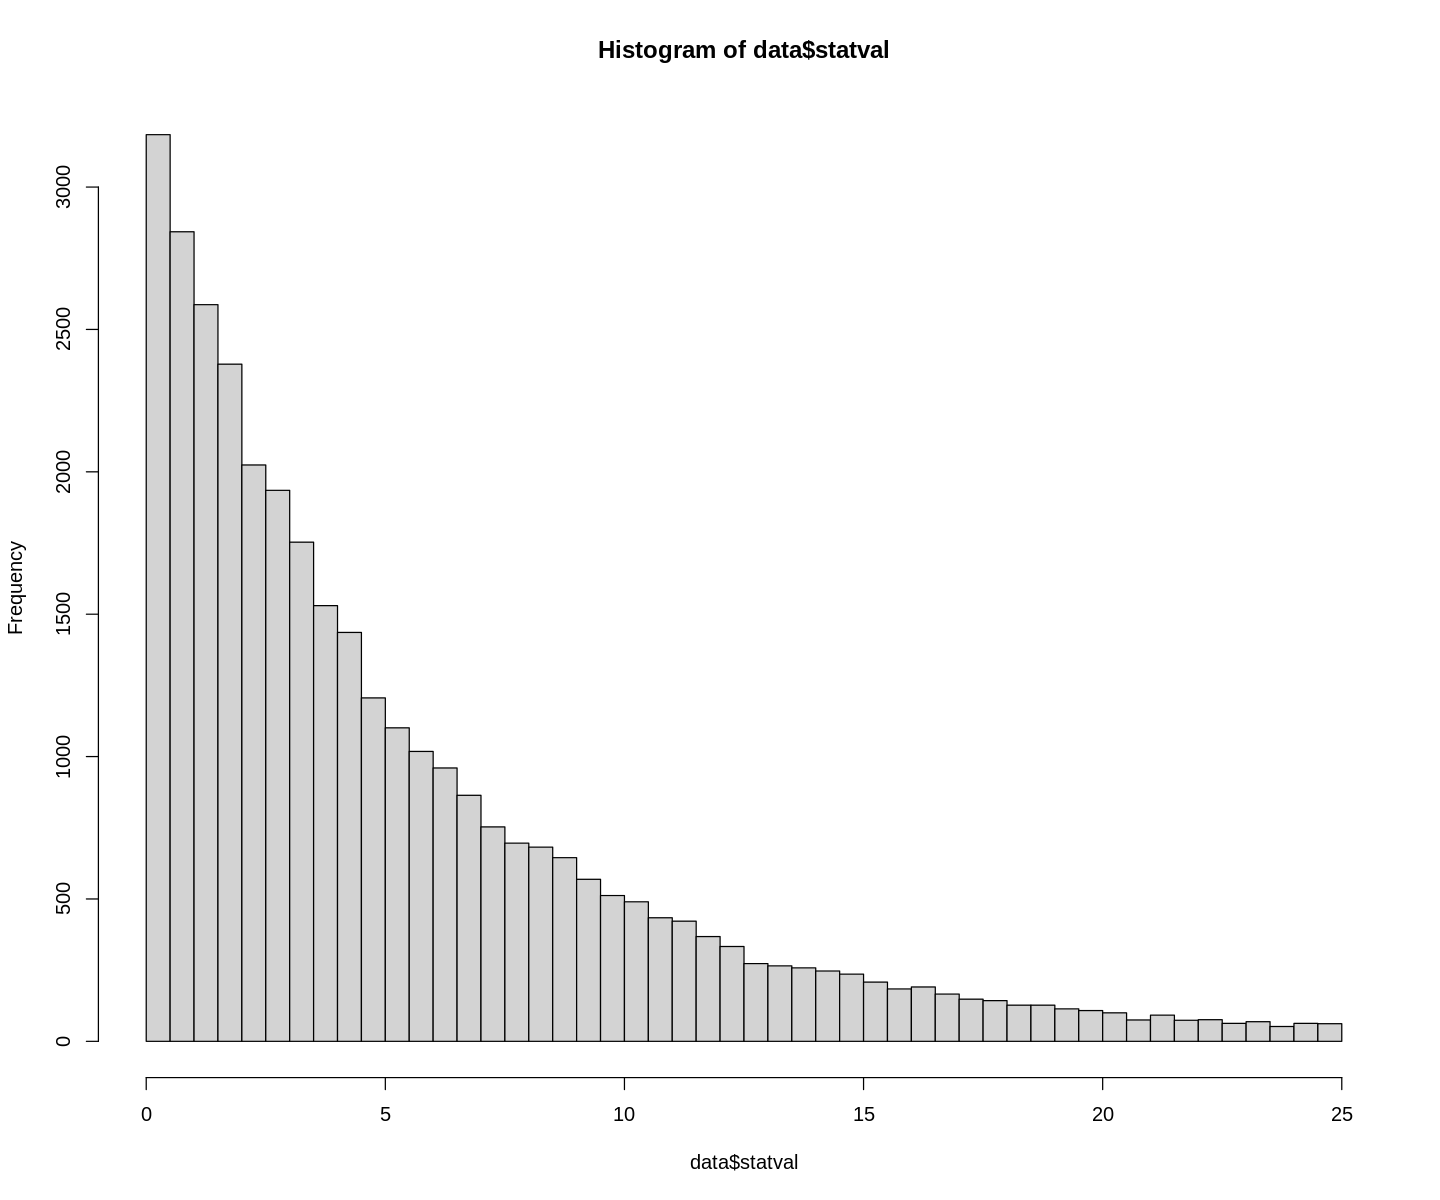

In [10]:
sql = "select statval, eq.*
 from ReturnsDataInIntervalsCleanedSkip090 eq
 join historical_stats_modern h on h.systemid=eq.systemid and h.date = DateStart
 where statname='deltaequityp30' and  statval > 0 and statval <= 25 and Age > 90"

data = getC2ScoreDbData(sql)
overview(data)
hist(data$statval,breaks=50)



We have calculated and stored the whole population statistics of strategies daily returns after 7, 14, ..., 360 days. Day after day. Now, we selected a particular statistics data (a sample) from the whole population. Collective2 data are joined with a cleaned strategies set used for the population calculations. We want to know, if the average of returns of the sample is significantly higher than an average of returns of the whole population. A significance level is  0.05 .

The following table contains this hypothesis tests for defined stats intervals and all 7, 14, ..., 360 days time intervals.


Descriptive stats of all data selected in the experiment:
     Systems    Obsrvtns     Minimum     1st Qu.      Median        Mean     3rd Qu.     Maximum          SD 
        1802       34244      0.1000      1.5000      3.7000      5.3576      7.6000     25.0000      5.1000 



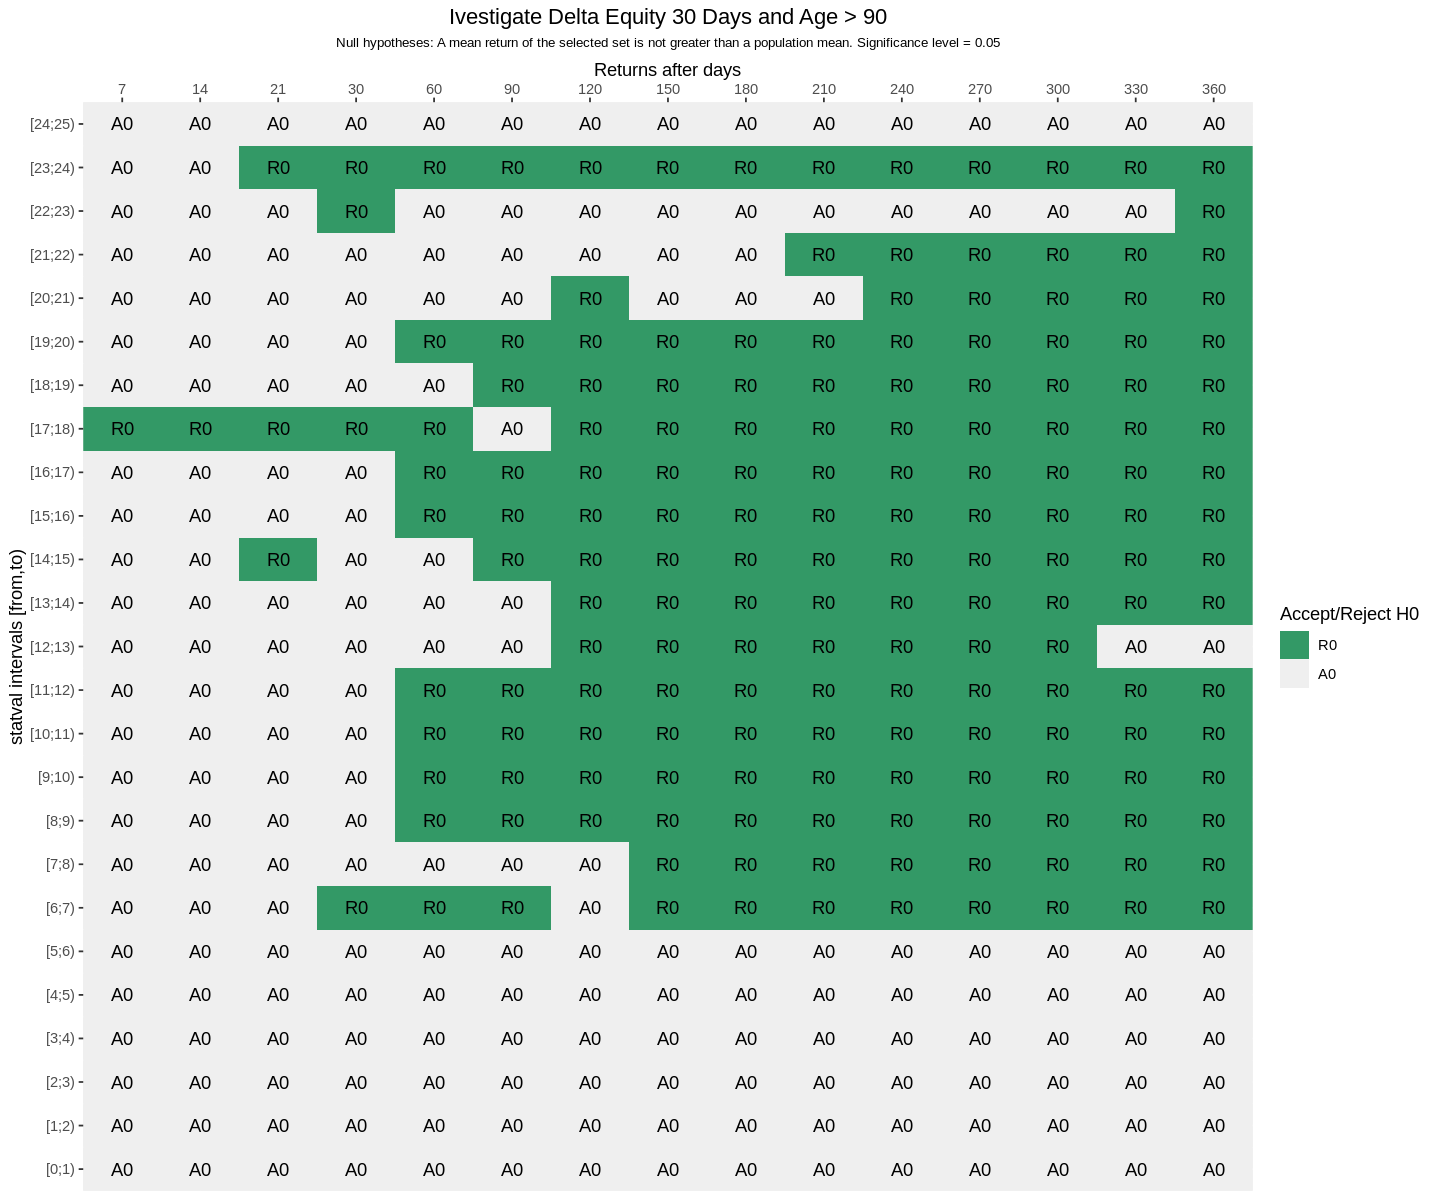

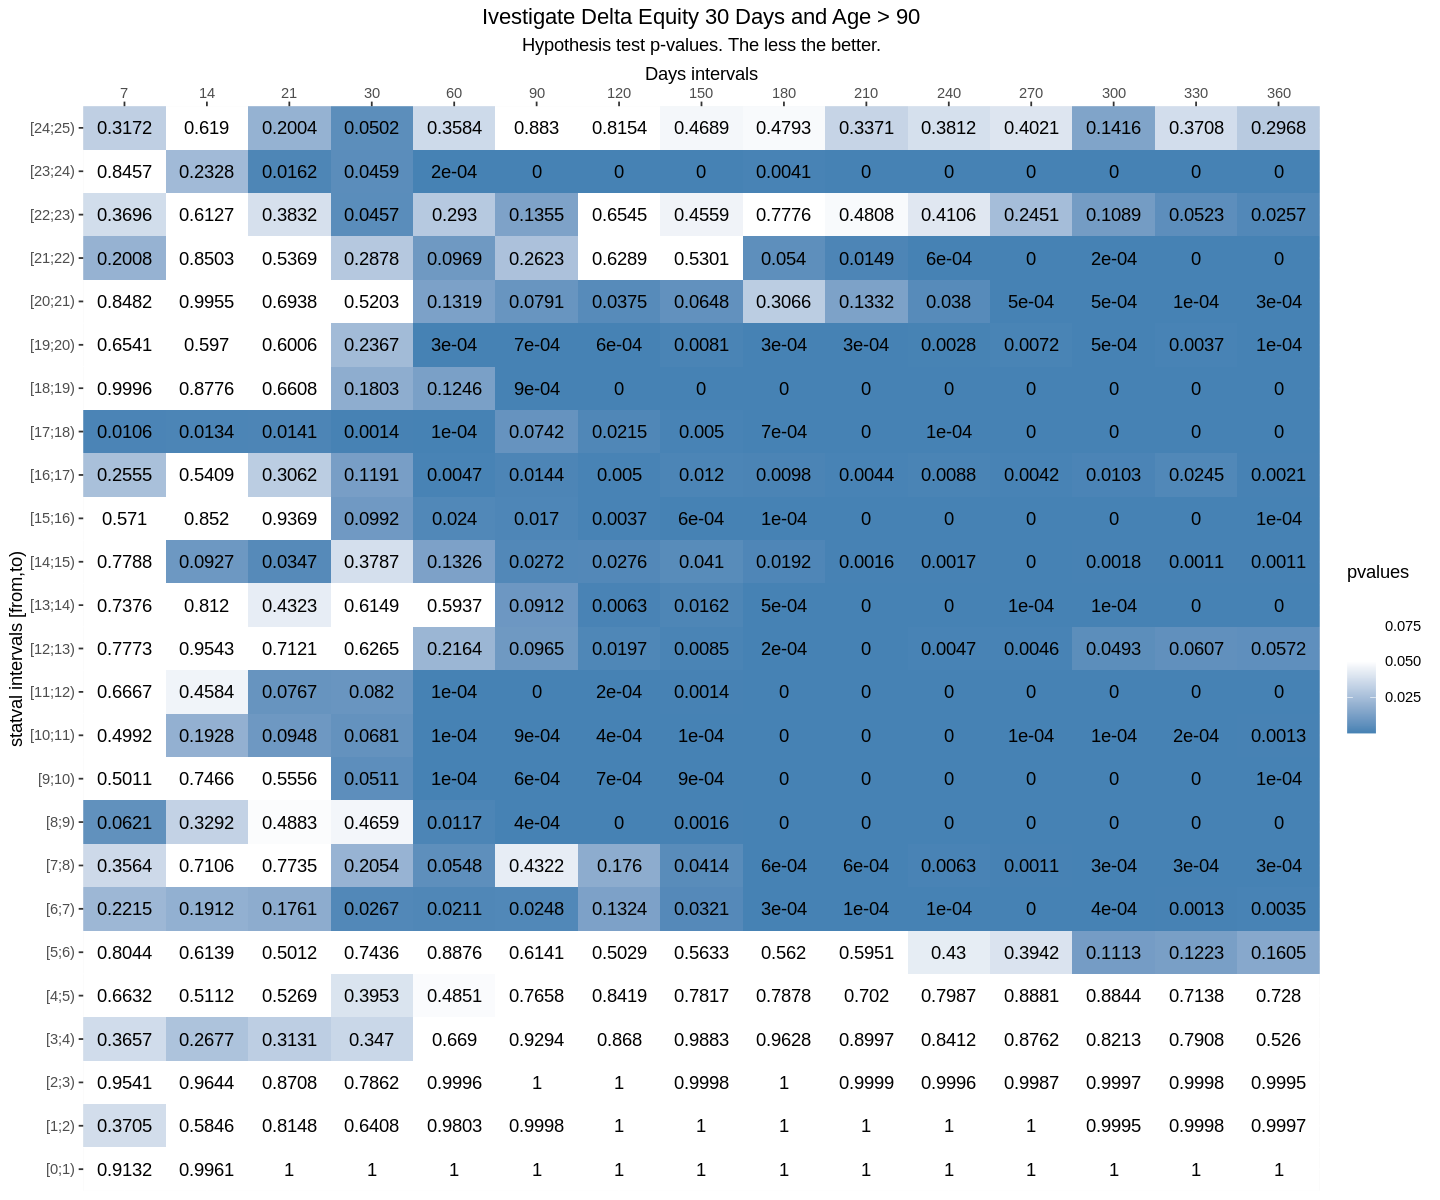

In [11]:
experiment = list(
  name = "deltaequityp30 and Age > 90",
  description = "Ivestigate Delta Equity 30 Days and Age > 90",
  sqlText = sql, # the sql above  
  attributeName = "statval",
  attributeSteps = seq(from = 0, to = 25, by = 1))

result = makeExperiment(experiment)


Hypothesis test of sample standard deviation.

Alternative hypothesis: The sample standard deviation is less than the population SD.


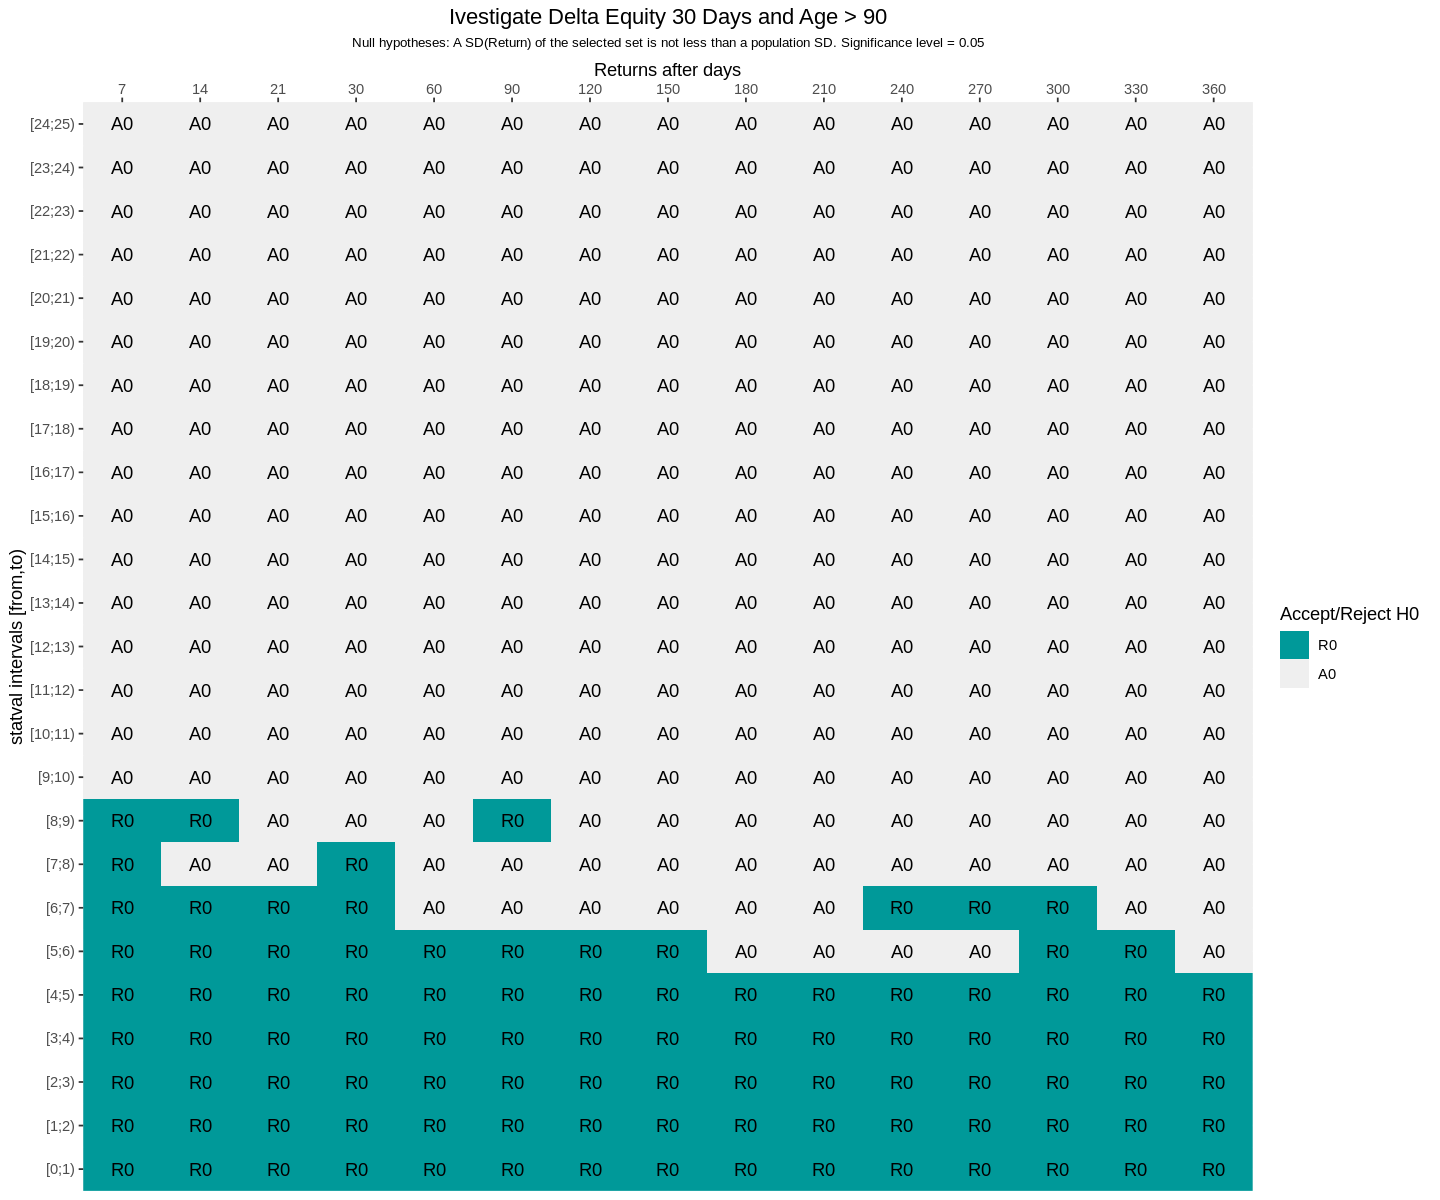

In [12]:
showSDLessHypothesisTest(experiment, result)

In [13]:
showObservationsCounts(experiment, result) 


The following table contains numbers of observations in the used statistics intervals.
A number of observations in the sample is an important part of the hypothesis testing. Be careful if it is low (less than 30).
Collective2 data are calculated in 7-days intervals. It means we have less observations which decreases hypotesis testing reliability. Use daily data tests if available.
Numbers of observations shown in this table are NOT numbers of C2 strategies! Every strategy can have many observations in any statistics interval. That is what is shown here.


Selection,Obs007,Obs014,Obs021,Obs030,Obs060,Obs090,Obs120,Obs150,Obs180,Obs210,Obs240,Obs270,Obs300,Obs330,Obs360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24 <= statval < 25,120,117,114,109,100,92,82,74,62,47,38,33,28,23,21
23 <= statval < 24,120,117,114,109,96,87,77,74,74,68,62,58,55,47,45
22 <= statval < 23,137,133,128,123,112,105,94,86,79,69,61,54,49,45,40
21 <= statval < 22,162,159,155,150,131,122,112,100,88,79,71,63,62,50,46
20 <= statval < 21,182,179,173,163,149,135,125,113,106,98,91,83,76,69,59
19 <= statval < 20,211,207,207,193,168,156,143,129,114,106,95,89,79,67,59
18 <= statval < 19,259,246,239,234,214,201,186,167,149,140,125,109,101,89,77
17 <= statval < 18,283,276,270,258,239,223,207,186,159,146,133,122,110,97,86
16 <= statval < 17,364,356,340,319,287,267,243,217,194,182,162,145,129,113,100



SampleMetricValue minus PopulationMetricValue

This table shows differences between metric values calculated for the whole population and the current sample metric values. (See the chapter 'Population statistics'.)
This is different from our hypothesis test. Our hypothesis test tests an (alternative) hypothesis 'Is a mean of the sample greater than a mean of the population?'
But our metric is 'Mean divided by SD'. So the standard deviation plays a role in it.
Our metric is greater when a numerator is greater and/or denominator is less. It is up to you what you prefer.



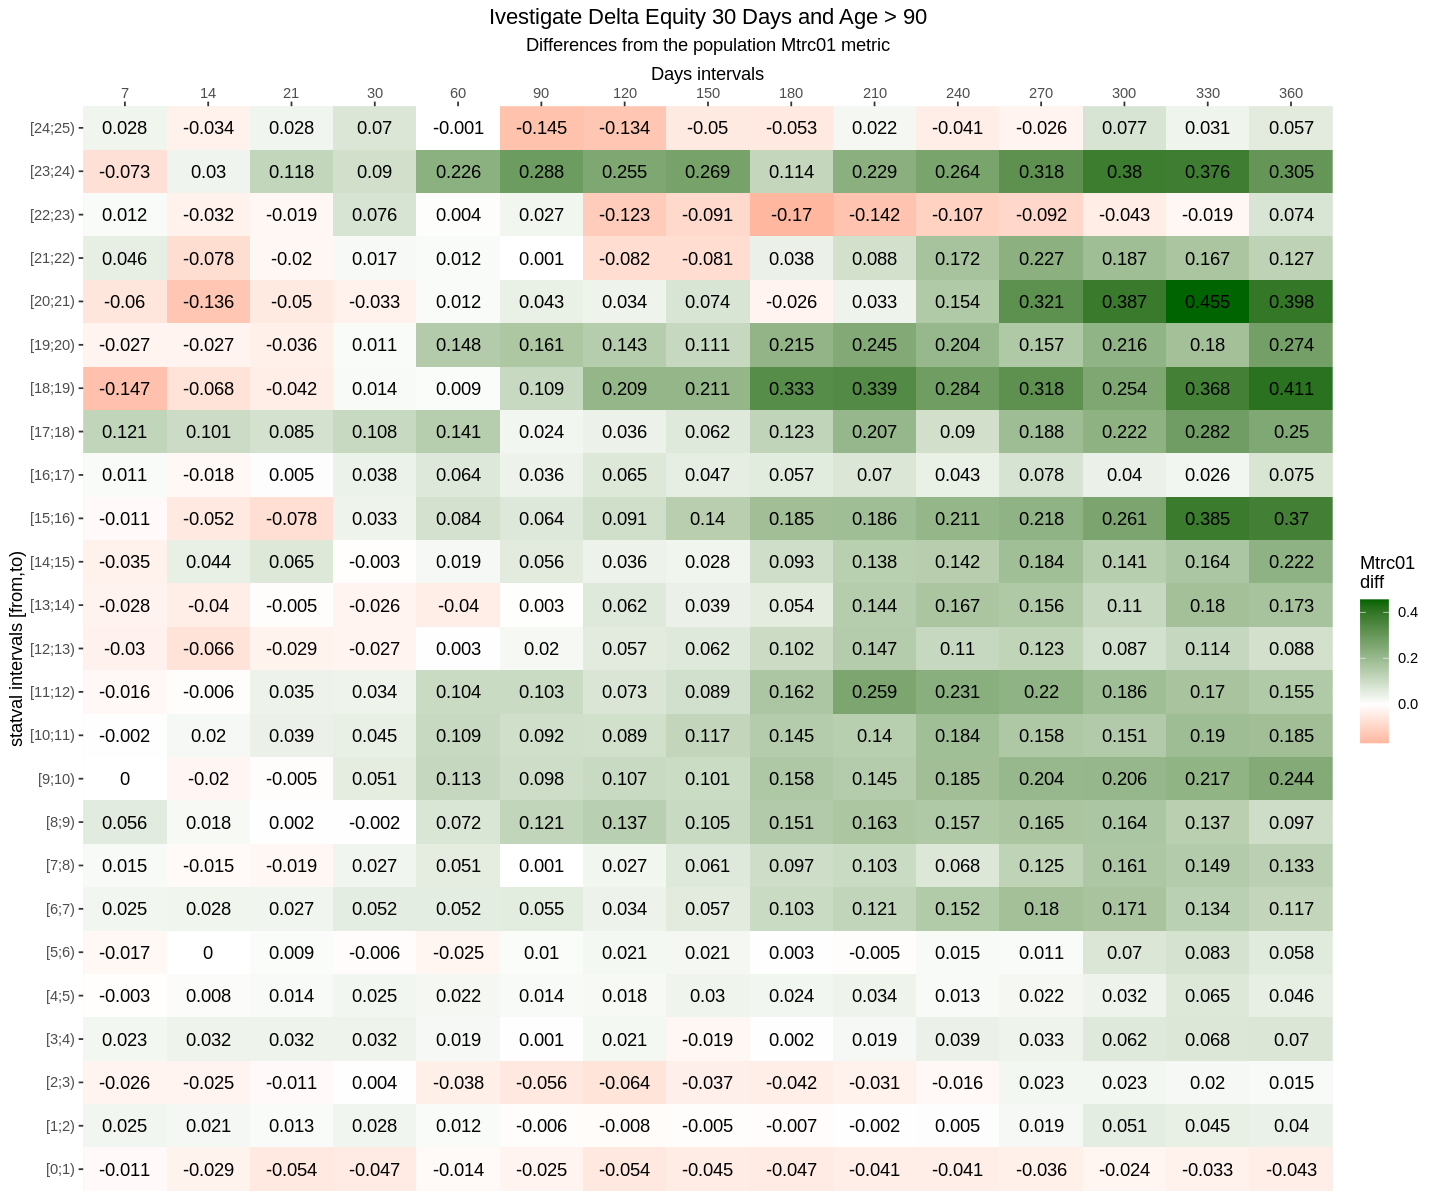

In [14]:
showMetricDifferences(experiment, result)

In [15]:
showSystemsCounts(experiment, result)



Numbers of strategies observed in defined intervals.

Selection,Sys007,Sys014,Sys021,Sys030,Sys060,Sys090,Sys120,Sys150,Sys180,Sys210,Sys240,Sys270,Sys300,Sys330,Sys360
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
24 <= statval < 25,95,92,89,84,78,71,64,58,48,39,32,27,26,21,19
23 <= statval < 24,98,96,94,91,79,72,64,62,62,57,51,47,45,43,41
22 <= statval < 23,113,109,105,104,95,88,78,71,65,56,50,44,39,37,35
21 <= statval < 22,134,132,128,125,108,103,93,82,72,65,60,53,52,44,40
20 <= statval < 21,146,143,138,128,118,106,97,88,83,76,69,63,58,54,46
19 <= statval < 20,167,164,164,152,129,122,113,104,90,82,74,70,62,52,45
18 <= statval < 19,183,174,168,167,151,141,130,118,106,102,96,84,78,69,58
17 <= statval < 18,198,192,190,182,169,160,149,133,110,99,90,84,75,68,59
16 <= statval < 17,257,253,241,226,204,190,170,149,135,128,115,104,93,82,74


### Discussion

....................